In [3]:
print("Bismillah")

Bismillah


In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756185 sha256=2579926b8e3081f387c7be1401ab713f479e639aeef4bd8ed318274feca5b4dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-ve9ljjrm/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [4]:
import pandas as pd
import math
from scipy.spatial import distance # for Eucledean Distance
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # For Map
import numpy as np
%matplotlib inline
print("SetUp Complete")

SetUp Complete


In [5]:
covid = pd.read_csv('/content/drive/MyDrive/BDA/df_0000001_20200922055707.csv', index_col = 0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9,10,11,12,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
covid.head()

,Date_Time,id,age,gender,infection_status,days_since_infection,date_of_infection,date_of_symptoms,date_of_recovery,date_of_death,date_hospital_check_in,date_hospital_check_out,residence_id,school_id,workplace_id,currentLocationID,currentLocationType,lat,lon,zone_id,is_notified_to_isolate,is_symptomatic,incubation_period,days_since_isolation,isolation_times,days_since_symptomatic,in_hospital,wears_mask,type_of_job,morbidity,exposure_time,infected_from_user_id,transmitted_count,asymptomatic_transmission,locationID_of_infection,income,household_size,bmi,date_of_test,test_result,Scenario
0,2020-01-01 00:00:00,32645,29,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,282,3562,282,282,residential,-6.221990,106.971849,0,0,0,3.783601,0,0,0,0,0,Remote worker,None,1.837003,-1,0,-1,-1,5774.248719,6,25,NaN,-1,0000001_20200922055707
1,2020-01-01 00:00:00,20022,30,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2247,3605,4761,2247,residential,-6.244313,106.783033,8,0,0,9.117633,0,0,0,0,0,Health worker,None,1.808421,-1,0,-1,-1,14384.879182,1,24,NaN,-1,0000001_20200922055707
2,2020-01-01 00:00:00,18409,32,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2122,3590,4744,2122,residential,-6.173000,106.801472,2,0,0,2.042305,0,0,0,0,0,Other job,None,1.795266,-1,0,-1,-1,9502.567895,4,24,NaN,-1,0000001_20200922055707
3,2020-01-01 00:00:00,34113,29,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,422,3576,3932,422,residential,-6.101532,106.914825,4,0,0,11.241115,0,0,0,0,0,Other job,None,1.805949,-1,0,-1,-1,7029.974753,5,20,NaN,-1,0000001_20200922055707
4,2020-01-01 00:00:00,40168,58,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1647,3586,4326,1647,residential,-6.171371,106.939750,4,0,0,9.082528,0,0,0,0,0,Other job,None,0.403426,-1,0,-1,-1,12378.711455,2,31,NaN,-1,0000001_20200922055707


In [ ]:
covid.shape

(6800000, 41)

In [ ]:
covid.columns

Index(['Date_Time', 'id', 'age', 'gender', 'infection_status',
       'days_since_infection', 'date_of_infection', 'date_of_symptoms',
       'date_of_recovery', 'date_of_death', 'date_hospital_check_in',
       'date_hospital_check_out', 'residence_id', 'school_id', 'workplace_id',
       'currentLocationID', 'currentLocationType', 'lat', 'lon', 'zone_id',
       'is_notified_to_isolate', 'is_symptomatic', 'incubation_period',
       'days_since_isolation', 'isolation_times', 'days_since_symptomatic',
       'in_hospital', 'wears_mask', 'type_of_job', 'morbidity',
       'exposure_time', 'infected_from_user_id', 'transmitted_count',
       'asymptomatic_transmission', 'locationID_of_infection', 'income',
       'household_size', 'bmi', 'date_of_test', 'test_result', 'Scenario'],
      dtype='object')

# **Task 1 Question 1:** How many active cases (infected individuals) were there on 2020-03-01 (01 March 2020)?

In [ ]:
type(covid.Date_Time.iloc[0])

str

In [ ]:
recordsof1march = covid.Date_Time.map(lambda p : '2020-03-01' in p)
infected1stmarch = covid.loc[(recordsof1march) & (covid.infection_status == 'infected')]
infected_individuals = infected1stmarch.id.unique().size
print('Number of infected individuals are ', infected_individuals)

Number of infected individuals are  1031


# **Task 1 Question 2:** How many people died on 2020-03-01 (01 March 2020)? 

In [ ]:
covid.infection_status.unique().tolist()

['susceptible', 'infected', 'recovered', 'deceased']

In [ ]:
died1stmarch = covid.loc[(recordsof1march) & (covid.infection_status == 'deceased')]
deceased_individuals = died1stmarch.id.unique().size
print( deceased_individuals, 'died on 2020-03-01')

49 died on 2020-03-01


# **Task 1 Question 3:** What is the total number of infections, recoveries and deaths?  

In [ ]:
total_Recovered = covid.loc[ (covid.infection_status == 'recovered')]
uniqueRecovered = total_Recovered.id.unique().size

print('Number Of recoveries', uniqueRecovered)

Number Of recoveries 3658


In [ ]:
total_infections = covid.loc[ (covid.infection_status == 'infected')]
uniqueInfections = total_infections.id.unique().size

print('Number Of Infections', uniqueInfections)

Number Of Infections 3854


In [ ]:
total_dead = covid.loc[ (covid.infection_status == 'deceased')]
uniqueDead = total_dead.id.unique().size

print('Number Of Dead', uniqueDead)

Number Of Dead 215


# **Task 1 Question 4:** How many unique individuals in the dataset

In [ ]:
unique_ids_count = covid.id.unique().size
print('Number Of Unique Individuals', unique_ids_count)

Number Of Unique Individuals 10000


# **Task 1 Question 5:** How many unique locations and their names in the dataset? 

In [ ]:
No_unique_Loc = covid.currentLocationID.unique().size
print('Number Of Unique Locations', No_unique_Loc)

Number Of Unique Locations 4575


In [ ]:
covid.currentLocationType.unique().tolist() #Names of Unique Locations 

['residential', 'shopping_mall', 'market', 'school', 'employment', 'hospital']

In [ ]:
covid[['currentLocationID', 'currentLocationType']].drop_duplicates() #Unique LocationIds with their Names

,currentLocationID,currentLocationType
0,282,residential
1,2247,residential
2,2122,residential
3,422,residential
4,1647,residential
...,...,...
6664706,104,residential
6710969,1447,residential
6744934,2829,residential
6765332,2077,residential


# **Task 1 Question 6:** Which school is the closest to a residence ID = 3115?
Hint: Use Euclidean distance using the lat and long

In [ ]:
type(covid.currentLocationID.loc[0])

numpy.int64

In [ ]:
loc3115 = covid[ (covid.currentLocationID == 3115) & (covid.currentLocationType == 'residential')] #Or covid.loc[0 , (covid.currentLocationID == 3115)]
loc3115

,Date_Time,id,age,gender,infection_status,days_since_infection,date_of_infection,date_of_symptoms,date_of_recovery,date_of_death,date_hospital_check_in,date_hospital_check_out,residence_id,school_id,workplace_id,currentLocationID,currentLocationType,lat,lon,zone_id,is_notified_to_isolate,is_symptomatic,incubation_period,days_since_isolation,isolation_times,days_since_symptomatic,in_hospital,wears_mask,type_of_job,morbidity,exposure_time,infected_from_user_id,transmitted_count,asymptomatic_transmission,locationID_of_infection,income,household_size,bmi,date_of_test,test_result,Scenario
84,2020-01-01 00:00:00,39964,56,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3577,3115,3115,residential,-6.190224,106.795937,8,0,0,2.986593,0,0,0,0,0,Remote worker,Cardiovascular,2.371433,-1,0,-1,-1,10487.242555,3,22,NaN,-1,0000001_20200922055707
106,2020-01-01 00:00:00,18636,28,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3602,4132,3115,residential,-6.190224,106.795937,8,0,0,7.378835,0,0,0,0,0,Other job,Cardiovascular,1.718890,-1,0,-1,-1,9951.238819,3,29,NaN,-1,0000001_20200922055707
516,2020-01-01 08:00:00,39964,56,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3577,3115,3115,residential,-6.190224,106.795937,8,0,0,2.986593,0,0,0,0,0,Remote worker,Cardiovascular,2.261871,-1,0,-1,-1,10487.242555,3,22,NaN,-1,0000001_20200922055707
1812,2020-01-01 22:00:00,39964,56,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3577,3115,3115,residential,-6.190224,106.795937,8,0,0,2.986593,0,0,0,0,0,Remote worker,Cardiovascular,1.881402,-1,0,-1,-1,10487.242555,3,22,NaN,-1,0000001_20200922055707
1834,2020-01-01 22:00:00,18636,28,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3602,4132,3115,residential,-6.190224,106.795937,8,0,0,7.378835,0,0,0,0,0,Other job,Cardiovascular,2.086719,-1,0,-1,-1,9951.238819,3,29,NaN,-1,0000001_20200922055707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878558,2020-05-14 19:00:00,38925,33,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3609,3750,3115,residential,-6.190224,106.795937,8,0,0,6.632858,0,0,0,0,0,Other job,None,0.907385,-1,0,-1,-1,10210.265521,3,28,NaN,-1,0000001_20200922055707
878990,2020-05-14 22:00:00,38925,33,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3609,3750,3115,residential,-6.190224,106.795937,8,0,0,6.632858,0,0,0,0,0,Other job,None,2.243789,-1,0,-1,-1,10210.265521,3,28,NaN,-1,0000001_20200922055707
879422,2020-05-15 00:00:00,38925,33,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3609,3750,3115,residential,-6.190224,106.795937,8,0,0,6.632858,0,0,0,0,0,Other job,None,0.119334,-1,0,-1,-1,10210.265521,3,28,NaN,-1,0000001_20200922055707
880718,2020-05-15 19:00:00,38925,33,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3115,3609,3750,3115,residential,-6.190224,106.795937,8,0,0,6.632858,0,0,0,0,0,Other job,None,2.949304,-1,0,-1,-1,10210.265521,3,28,NaN,-1,0000001_20200922055707


In [ ]:
loc3115[['lat', 'lon']].drop_duplicates()

,lat,lon
84,-6.190224,106.795937


In [ ]:
loc3115_lat = loc3115.iloc[0].lat
loc3115_lon = loc3115.iloc[0].lon

In [ ]:
covid.columns

Index(['Date_Time', 'id', 'age', 'gender', 'infection_status',
       'days_since_infection', 'date_of_infection', 'date_of_symptoms',
       'date_of_recovery', 'date_of_death', 'date_hospital_check_in',
       'date_hospital_check_out', 'residence_id', 'school_id', 'workplace_id',
       'currentLocationID', 'currentLocationType', 'lat', 'lon', 'zone_id',
       'is_notified_to_isolate', 'is_symptomatic', 'incubation_period',
       'days_since_isolation', 'isolation_times', 'days_since_symptomatic',
       'in_hospital', 'wears_mask', 'type_of_job', 'morbidity',
       'exposure_time', 'infected_from_user_id', 'transmitted_count',
       'asymptomatic_transmission', 'locationID_of_infection', 'income',
       'household_size', 'bmi', 'date_of_test', 'test_result', 'Scenario'],
      dtype='object')

In [ ]:
covid.info() # OR covid.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6800000 entries, 0 to 6799999
Data columns (total 41 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date_Time                  object 
 1   id                         int64  
 2   age                        int64  
 3   gender                     int64  
 4   infection_status           object 
 5   days_since_infection       float64
 6   date_of_infection          object 
 7   date_of_symptoms           object 
 8   date_of_recovery           object 
 9   date_of_death              object 
 10  date_hospital_check_in     object 
 11  date_hospital_check_out    object 
 12  residence_id               int64  
 13  school_id                  int64  
 14  workplace_id               int64  
 15  currentLocationID          int64  
 16  currentLocationType        object 
 17  lat                        float64
 18  lon                        float64
 19  zone_id                    int64  
 20  is

In [ ]:
locSchool = covid[(covid.currentLocationType == 'school')].drop_duplicates(subset = ['currentLocationID'])
# locSchool.currentLocationID.drop_duplicates()
# locSchool.id.nunique() #Number of datas in any column

locSchool

,Date_Time,id,age,gender,infection_status,days_since_infection,date_of_infection,date_of_symptoms,date_of_recovery,date_of_death,date_hospital_check_in,date_hospital_check_out,residence_id,school_id,workplace_id,currentLocationID,currentLocationType,lat,lon,zone_id,is_notified_to_isolate,is_symptomatic,incubation_period,days_since_isolation,isolation_times,days_since_symptomatic,in_hospital,wears_mask,type_of_job,morbidity,exposure_time,infected_from_user_id,transmitted_count,asymptomatic_transmission,locationID_of_infection,income,household_size,bmi,date_of_test,test_result,Scenario
433,2020-01-01 08:00:00,20022,30,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2247,3605,4761,3605,school,-6.192856,106.718445,9,0,0,9.117633,0,0,0,0,0,Health worker,None,0.418624,-1,0,-1,-1,14384.879182,1,24,NaN,-1,0000001_20200922055707
443,2020-01-01 08:00:00,40027,56,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2265,3578,3878,3578,school,-6.269472,106.968671,0,0,0,2.455521,0,0,0,0,0,Other job,None,1.657984,-1,0,-1,-1,6684.249042,5,27,NaN,-1,0000001_20200922055707
444,2020-01-01 08:00:00,38822,32,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3283,3577,4192,3577,school,-6.199995,106.746098,9,0,0,7.267405,0,0,0,0,0,Other job,None,2.396571,-1,0,-1,-1,10754.758669,3,31,NaN,-1,0000001_20200922055707
449,2020-01-01 08:00:00,33175,37,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,57,3580,4668,3580,school,-6.137501,106.717376,3,0,0,3.614547,0,0,0,0,0,Other job,None,1.720807,-1,0,-1,-1,8212.031911,4,27,NaN,-1,0000001_20200922055707
451,2020-01-01 08:00:00,37457,30,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,661,3585,4264,3585,school,-6.138384,106.813053,2,0,0,12.206613,0,0,0,0,0,Other job,None,0.501334,-1,0,-1,-1,11179.833693,2,22,NaN,-1,0000001_20200922055707
452,2020-01-01 08:00:00,17921,20,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1531,3571,4179,3571,school,-6.145109,106.913419,4,0,0,7.148233,0,0,0,0,0,No Job,None,1.563753,-1,0,-1,-1,11285.090713,3,31,NaN,-1,0000001_20200922055707
456,2020-01-01 08:00:00,39619,8,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1605,3573,4422,3573,school,-6.261802,106.875144,7,0,0,9.498937,0,0,0,0,0,No Job,None,0.420141,-1,0,-1,-1,12244.068486,1,23,NaN,-1,0000001_20200922055707
461,2020-01-01 08:00:00,20266,43,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2717,3606,4440,3606,school,-6.177089,106.824028,2,0,0,5.687715,0,0,0,0,0,Other job,None,1.262086,-1,0,-1,-1,10610.432616,3,28,NaN,-1,0000001_20200922055707
463,2020-01-01 08:00:00,39272,7,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1544,3603,4301,3603,school,-6.100567,106.699752,3,0,0,5.702765,0,0,0,0,0,No Job,None,2.859657,-1,0,-1,-1,8232.786500,5,29,NaN,-1,0000001_20200922055707
464,2020-01-01 08:00:00,18594,44,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2106,3602,4605,3602,school,-6.278302,106.739301,6,0,0,6.954545,0,0,0,0,0,Other job,None,0.594905,-1,0,-1,-1,5726.073522,6,31,NaN,-1,0000001_20200922055707


In [ ]:
def calcultate_distance (row):
    row.Distance = math.sqrt( (loc3115_lat - row.lat)**2 + (loc3115_lon - row.lon)**2 ) #Euclidean Distance
    # row.lat = distance.euclidean((loc3115_lat,loc3115_lon),(row.lat,row.lon))   #Another way for Euclidean
    return row
    

In [ ]:
locSchool['Distance'] = 0 # Adding a Column for Distance

locSchool['Distance'].astype('float64') # Making type Float64 same as lat and lon
locSchool.shape

(50, 42)

In [ ]:
Min_Dist_Dataset = locSchool.apply(calcultate_distance, axis='columns')
min_val =  Min_Dist_Dataset.Distance.min()
Min_Dist_Dataset.loc[Min_Dist_Dataset.Distance == min_val][['school_id' , 'currentLocationType', 'lat', 'lon', 'Distance']]

,school_id,currentLocationType,lat,lon,Distance
645,3563,school,-6.204529,106.797409,0.014381


# **Task 1 Question 7:** What percentage of individuals aged b/w 30 and 60 visit schools at 08:00 am? 

In [ ]:
eightAM = covid.Date_Time.map(lambda p : '8:00:00' in p)
criteria = covid.loc[(covid.age >= 30) & (covid.age <= 60) & (covid.currentLocationType == 'school') & (eightAM)].drop_duplicates(subset = 'id') #Assuming between is inclusive
criteria

,Date_Time,id,age,gender,infection_status,days_since_infection,date_of_infection,date_of_symptoms,date_of_recovery,date_of_death,date_hospital_check_in,date_hospital_check_out,residence_id,school_id,workplace_id,currentLocationID,currentLocationType,lat,lon,zone_id,is_notified_to_isolate,is_symptomatic,incubation_period,days_since_isolation,isolation_times,days_since_symptomatic,in_hospital,wears_mask,type_of_job,morbidity,exposure_time,infected_from_user_id,transmitted_count,asymptomatic_transmission,locationID_of_infection,income,household_size,bmi,date_of_test,test_result,Scenario
433,2020-01-01 08:00:00,20022,30,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2247,3605,4761,3605,school,-6.192856,106.718445,9,0,0,9.117633,0,0,0,0,0,Health worker,None,0.418624,-1,0,-1,-1,14384.879182,1,24,NaN,-1,0000001_20200922055707
443,2020-01-01 08:00:00,40027,56,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2265,3578,3878,3578,school,-6.269472,106.968671,0,0,0,2.455521,0,0,0,0,0,Other job,None,1.657984,-1,0,-1,-1,6684.249042,5,27,NaN,-1,0000001_20200922055707
444,2020-01-01 08:00:00,38822,32,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3283,3577,4192,3577,school,-6.199995,106.746098,9,0,0,7.267405,0,0,0,0,0,Other job,None,2.396571,-1,0,-1,-1,10754.758669,3,31,NaN,-1,0000001_20200922055707
449,2020-01-01 08:00:00,33175,37,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,57,3580,4668,3580,school,-6.137501,106.717376,3,0,0,3.614547,0,0,0,0,0,Other job,None,1.720807,-1,0,-1,-1,8212.031911,4,27,NaN,-1,0000001_20200922055707
451,2020-01-01 08:00:00,37457,30,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,661,3585,4264,3585,school,-6.138384,106.813053,2,0,0,12.206613,0,0,0,0,0,Other job,None,0.501334,-1,0,-1,-1,11179.833693,2,22,NaN,-1,0000001_20200922055707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790691,2020-01-06 08:00:00,37768,33,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1679,3596,4119,3596,school,-6.179334,106.901671,4,0,0,7.204305,0,0,0,0,0,Other job,None,0.400803,-1,0,-1,-1,9894.421855,4,22,NaN,-1,0000001_20200922055707
6790808,2020-01-09 08:00:00,19599,34,1,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,948,3585,4056,3585,school,-6.138384,106.813053,2,0,0,3.683988,0,0,0,0,0,Other job,None,0.521872,-1,0,-1,-1,3226.085076,8,19,NaN,-1,0000001_20200922055707
6795953,2020-01-03 08:00:00,32363,37,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2904,3567,4578,3567,school,-6.227399,106.821917,8,0,0,38.245297,0,0,0,0,0,Other job,None,0.068858,-1,0,-1,-1,10727.782774,3,23,NaN,-1,0000001_20200922055707
6798009,2020-01-04 08:00:00,32323,32,0,susceptible,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3125,3581,4104,3581,school,-6.246997,106.877579,5,0,0,20.482251,0,0,0,0,0,Other job,None,2.310832,-1,0,-1,-1,5740.383492,6,28,NaN,-1,0000001_20200922055707


In [ ]:
percentage_per_total_individuals = criteria.shape[0] / unique_ids_count * 100 #len(criteria.index) 
print("Percentage of individuals aged b/w 30 and 60 visit schools at 08:00 am are", percentage_per_total_individuals, "%") #Percentage is w.r.t all Individuals

Percentage of individuals aged b/w 30 and 60 visit schools at 08:00 am are 48.16 %


# **Task 1 Question 8:** What is the most dominant daily path of individual (ID= 37415) ? 
Hint: There are 5 timestamps per day (00:00,08:00,16:00,19:00,22:00). An individual can be at his residence (currentLocationType) at given timestamp, then can move to school on the next time stamp and so on. COMPLEX QUESTION! Can skip it if too difficult.

In [ ]:
id37415 = covid.loc[covid.id == 37415]

In [ ]:
id37415[['Date','Time']] = id37415.Date_Time.str.split(expand=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
path_list = id37415.groupby(['Date']).apply(lambda df: df.currentLocationType.loc[:]).tolist()

In [ ]:
myHlist = []
for x in range(0,len(path_list),5):
  myHlist.append(path_list[x:x+5])

Routes1 = pd.DataFrame(myHlist, columns = ['Time_00', 'Time_08', 'Time_16', 'Time_19' , 'Time_22'])

print("The most dominant path of 37415 is", Routes1.value_counts().index[0])
print("This Route has been taken", Routes1.value_counts()[0],"Times")

The most dominant path of 37415 is ('residential', 'employment', 'employment', 'residential', 'residential')
This Route has been taken 24 Times


In [ ]:
# Another Way To Do It
# Routes = pd.DataFrame(columns = ['Time_00', 'Time_08', 'Time_16', 'Time_19' , 'Time_22'])

# for x in range(0,len(path_list),5):
#   Routes.loc[x, 'Time_00'] = path_list[x]
#   Routes.loc[x, 'Time_08'] = path_list[x+1]
#   Routes.loc[x, 'Time_16'] = path_list[x+2]
#   Routes.loc[x, 'Time_19'] = path_list[x+3]
#   Routes.loc[x, 'Time_22'] = path_list[x+4]
  
# Route_Taken = Routes.value_counts()[0]
# Route = Routes.value_counts().index[0]
# print("The most dominant path of 37415 is",Route)
# print("This Route has been taken",Route_Taken,"Times")

The most dominant path of 37415 is ('residential', 'employment', 'employment', 'residential', 'residential')
This Route has been taken 24 Times


# **Task 1 Question 9:** What is the proximity (number of individuals sharing the same location) of an individual ID (37415) at a given date and time? 


In [ ]:
id37415_trun = id37415.loc[: , ['id', 'Date_Time', 'currentLocationID' , 'currentLocationType']]
id37415_trun

,id,Date_Time,currentLocationID,currentLocationType
159,37415,2020-01-01 00:00:00,3000,residential
591,37415,2020-01-01 08:00:00,3690,employment
1023,37415,2020-01-01 16:00:00,3690,employment
1455,37415,2020-01-01 19:00:00,3628,shopping_mall
1887,37415,2020-01-01 22:00:00,3000,residential
...,...,...,...,...
291759,37415,2020-05-15 00:00:00,3000,residential
292191,37415,2020-05-15 08:00:00,3690,employment
292623,37415,2020-05-15 16:00:00,3690,employment
293055,37415,2020-05-15 19:00:00,4791,market


In [ ]:
not37415_trun = covid.loc[(covid.id != 37415) & (covid.id.notnull())][['id', 'Date_Time', 'currentLocationID' , 'currentLocationType']]
not37415_trun
# not37415_trun.loc[(not37415_trun.id.isnull() )]

,id,Date_Time,currentLocationID,currentLocationType
0,32645,2020-01-01 00:00:00,282,residential
1,20022,2020-01-01 00:00:00,2247,residential
2,18409,2020-01-01 00:00:00,2122,residential
3,34113,2020-01-01 00:00:00,422,residential
4,40168,2020-01-01 00:00:00,1647,residential
...,...,...,...,...
6799995,32323,2020-05-15 19:00:00,3125,residential
6799996,38298,2020-05-15 19:00:00,1776,residential
6799997,32424,2020-05-15 22:00:00,987,residential
6799998,32323,2020-05-15 22:00:00,3125,residential


In [ ]:
# Another way to do it
# left = id37415_trun.set_index(['Date_Time', 'currentLocationID' , 'currentLocationType'])
# right = not37415_trun.set_index(['Date_Time', 'currentLocationID' , 'currentLocationType'])

# AnyGivenTimeSameAs37415 = left.join(right, lsuffix='_Of37415', rsuffix='_Not37415')  #Doing Left Join
# AnyGivenTimeSameAs37415

id_Of37415  id_Not37415
Date_Time           currentLocationID currentLocationType                         
2020-01-01 00:00:00 3000              residential               37415      38841.0
                                      residential               37415      37622.0
                                      residential               37415      32657.0
2020-01-01 08:00:00 3690              employment                37415      37235.0
                                      employment                37415      38915.0
...                                                               ...          ...
2020-05-15 19:00:00 4791              market                    37415      19853.0
                                      market                    37415      40500.0
2020-05-15 22:00:00 3000              residential               37415      38841.0
                                      residential               37415      37622.0
                                      residential               37415      32657.0

[9682 rows x 2 columns]

In [ ]:
# AnyGivenTimeSameAs37415.loc[(AnyGivenTimeSameAs37415.id_Not37415.isnull())].id_Not37415.size

17

In [ ]:
# AnyGivenTimeSameAs37415 = AnyGivenTimeSameAs37415[(AnyGivenTimeSameAs37415.id_Not37415.notnull())]
# # AnyGivenTimeSameAs37415['id_Not37415'].astype('int64')
# AnyGivenTimeSameAs37415['id_Not37415'] = AnyGivenTimeSameAs37415['id_Not37415'].astype('int64') #Due to NULLS the id_Not37415 was converted to float, I removed nulls and coverted back
# AnyGivenTimeSameAs37415

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id_Of37415  id_Not37415
Date_Time           currentLocationID currentLocationType                         
2020-01-01 00:00:00 3000              residential               37415        38841
                                      residential               37415        37622
                                      residential               37415        32657
2020-01-01 08:00:00 3690              employment                37415        37235
                                      employment                37415        38915
...                                                               ...          ...
2020-05-15 19:00:00 4791              market                    37415        19853
                                      market                    37415        40500
2020-05-15 22:00:00 3000              residential               37415        38841
                                      residential               37415        37622
                                      residential               37415        32657

[9665 rows x 2 columns]

In [ ]:
9682-17 #Just Checking

9665

In [ ]:
for_proximity = pd.merge(id37415_trun,not37415_trun,on=['Date_Time', 'currentLocationID' , 'currentLocationType']) #MERGE is used for Inner Join

# FOUND AN EASIER WAY TO DO THE ABOVE WITH SINGLE LINE!!! 

for_proximity

,id_x,Date_Time,currentLocationID,currentLocationType,id_y
0,37415,2020-01-01 00:00:00,3000,residential,38841
1,37415,2020-01-01 00:00:00,3000,residential,37622
2,37415,2020-01-01 00:00:00,3000,residential,32657
3,37415,2020-01-01 08:00:00,3690,employment,37235
4,37415,2020-01-01 08:00:00,3690,employment,38915
...,...,...,...,...,...
9660,37415,2020-05-15 19:00:00,4791,market,19853
9661,37415,2020-05-15 19:00:00,4791,market,40500
9662,37415,2020-05-15 22:00:00,3000,residential,38841
9663,37415,2020-05-15 22:00:00,3000,residential,37622


In [ ]:
Number_of_People = for_proximity.drop_duplicates(subset = ['id_x', 'Date_Time', 'id_y']).groupby(['Date_Time', 'currentLocationID' , 'currentLocationType']).id_y.count()

Number_of_People.rename("Number of People in Proximity with 37415 at any given date and time")

Date_Time            currentLocationID  currentLocationType
2020-01-01 00:00:00  3000               residential             3
2020-01-01 08:00:00  3690               employment              4
2020-01-01 16:00:00  3690               employment              1
2020-01-01 19:00:00  3628               shopping_mall          54
2020-01-01 22:00:00  3000               residential             3
                                                               ..
2020-05-15 00:00:00  3000               residential             3
2020-05-15 08:00:00  3690               employment              4
2020-05-15 16:00:00  3690               employment              4
2020-05-15 19:00:00  4791               market                 45
2020-05-15 22:00:00  3000               residential             3
Name: Number of People in Proximity with 37415 at any given date and time, Length: 663, dtype: int64

In [ ]:
Number_of_People.sum() #Just Checking

9665

# **Task 1 Question 10:** What is the age and gender of individual 37415? Did this individual get infected? If yes, how long did the infection last? And did the individual die?


In [ ]:
age_gender = covid[(covid.id == 37415)].drop_duplicates(subset = ['id'])[['age' , 'gender']]
age_gender

,age,gender
159,30,1


In [ ]:
age = age_gender.iloc[:1, 0]
gen = age_gender.iloc[:1, 1]

if  gen.iloc[0]== 0:
  gender = "female"
else:
  gender = "male"

print("The Age of ID 37415 is", age.iloc[0], "and gender is", gender)

The Age of ID 37415 is 30 and gender is male


In [ ]:
id37415.shape

(680, 43)

In [ ]:
id37415.columns

Index(['Date_Time', 'id', 'age', 'gender', 'infection_status',
       'days_since_infection', 'date_of_infection', 'date_of_symptoms',
       'date_of_recovery', 'date_of_death', 'date_hospital_check_in',
       'date_hospital_check_out', 'residence_id', 'school_id', 'workplace_id',
       'currentLocationID', 'currentLocationType', 'lat', 'lon', 'zone_id',
       'is_notified_to_isolate', 'is_symptomatic', 'incubation_period',
       'days_since_isolation', 'isolation_times', 'days_since_symptomatic',
       'in_hospital', 'wears_mask', 'type_of_job', 'morbidity',
       'exposure_time', 'infected_from_user_id', 'transmitted_count',
       'asymptomatic_transmission', 'locationID_of_infection', 'income',
       'household_size', 'bmi', 'date_of_test', 'test_result', 'Scenario',
       'Date', 'Time'],
      dtype='object')

In [ ]:
id37415_infected = id37415[id37415.infection_status == 'infected'].drop_duplicates(subset = 'Date')
Days_infected = id37415_infected.Date.size

if Days_infected == 0:
  is_infected = "No"
else:
  is_infected = "Yes"

print("37415 was infected =",is_infected)
print("The days he was infected is", Days_infected)

37415 was infected = Yes
The days he was infected is 29


In [ ]:
last_date_ofInfection = id37415_infected.tail(1)['Date'].iloc[0]
last_date_ofInfection

'2020-04-12'

In [ ]:
Dead_Records = id37415[(id37415.Date > last_date_ofInfection) & (id37415.infection_status == 'deceased')].id.size

if Dead_Records == 0:
  is_Dead = "No"
else:
  is_Dead = "Yes"

print("37415 died =", is_Dead)

37415 died = No


# **Task 1 Question 11:** What is the infection and mortality rate of health care workers?

In [ ]:
covid.type_of_job.drop_duplicates()

0     Remote worker
1     Health worker
2         Other job
15           No Job
Name: type_of_job, dtype: object

In [ ]:
Health_Worker_Set = covid[covid.type_of_job == 'Health worker']
Number_Health_Workers = len(covid[covid.type_of_job == 'Health worker'].drop_duplicates(subset = 'id').index)
Number_Health_Workers

403

In [ ]:
Infected_Health_Worker = Health_Worker_Set[Health_Worker_Set.infection_status == 'infected'].drop_duplicates(subset = 'id').id.count()
Infected_Health_Worker

387

In [ ]:
covid.infection_status.unique()

array(['susceptible', 'infected', 'recovered', 'deceased'], dtype=object)

In [ ]:
Dead_Health_Worker = Health_Worker_Set[Health_Worker_Set.infection_status == 'deceased'].drop_duplicates(subset = 'id').id.count()
Dead_Health_Worker

25

In [ ]:
infection_rate = Infected_Health_Worker / Number_Health_Workers * 100
mortality_rate = Dead_Health_Worker / Number_Health_Workers * 100

print ("The infection Rate is", infection_rate, "%")
print ("The mortality Rate is", mortality_rate, "%")

The infection Rate is 96.02977667493796 %
The mortality Rate is 6.20347394540943 %


# **Task 1 Question 12:**  Does the mortality rate change with age and gender?

In [ ]:
indiv_id = covid.drop_duplicates(subset = 'id')
Gender_Count = indiv_id.groupby(['gender']).id.count()
Gender_Count.index = ["Female","Male"]
Gender_Count

Female    4998
Male      5002
Name: id, dtype: int64

In [ ]:
female_dead = len(covid[(covid.gender == 0) & (covid.infection_status == "deceased")].drop_duplicates(subset = 'id'))
male_dead = len(covid[(covid.gender == 1) & (covid.infection_status == "deceased")].drop_duplicates(subset = 'id'))

print(female_dead, male_dead)

75 140


In [ ]:
print("Mortality rate of Females are", female_dead / Gender_Count[0] * 100, "%")
print("Mortality rate of Males are", male_dead / Gender_Count[1] * 100, "%")

Mortality rate of Females are 1.5006002400960383 %
Mortality rate of Males are 2.798880447820872 %


In [ ]:
Age_Count = covid.drop_duplicates(subset = ['id', 'infection_status']).groupby(['age']).infection_status.count()

In [ ]:
Dec_Age_Count = covid.loc[(covid.infection_status == "deceased")].drop_duplicates(subset = 'id').groupby(['age']).infection_status.count()

In [ ]:
a = pd.DataFrame(Age_Count) 
df = a.join(Dec_Age_Count, lsuffix='_Total', rsuffix='_Dead')  # Outer Join
df['infection_status_Dead'] = df['infection_status_Dead'].fillna(0) #Replacing Null Values with Zero
df

,infection_status_Total,infection_status_Dead
age,,
5,184,0.0
6,174,0.0
7,182,0.0
8,212,0.0
9,176,0.0
...,...,...
86,15,2.0
87,7,0.0
88,6,0.0


In [ ]:
df["Mortality_Rate"] = 0 #Adding A Column

In [ ]:
def get_Mortality_Rate_byAge (row):
  row.Mortality_Rate = row.infection_status_Dead / row.infection_status_Total * 100
  return row


df = df.apply(get_Mortality_Rate_byAge, axis='columns')
print("The Mortality Rate per Age is given below:")
df

The Mortality Rate per Age is given below:


,infection_status_Total,infection_status_Dead,Mortality_Rate
age,,,
5,184.0,0.0,0.000000
6,174.0,0.0,0.000000
7,182.0,0.0,0.000000
8,212.0,0.0,0.000000
9,176.0,0.0,0.000000
...,...,...,...
86,15.0,2.0,13.333333
87,7.0,0.0,0.000000
88,6.0,0.0,0.000000


# **Task 2 Question 1:**  Plot the total number of infections, recoveries and deaths w.r.t date. 

In [ ]:
covid[['Date','Time']] = covid.Date_Time.str.split(expand=True)
covid.shape

(6800000, 43)

In [ ]:
covid[(covid.infection_status != 'susceptible')].drop_duplicates(subset = ['id', 'infection_status']).groupby(['Date', 'infection_status']).infection_status.count()

Date        infection_status
2020-01-01  infected            2
2020-01-02  infected            1
2020-01-03  infected            1
2020-01-04  infected            1
2020-01-05  infected            1
                               ..
2020-05-08  recovered           2
2020-05-09  recovered           1
2020-05-11  recovered           1
2020-05-12  recovered           1
2020-05-14  recovered           1
Name: infection_status, Length: 299, dtype: int64

In [ ]:
infected = covid[(covid.infection_status == 'infected')].drop_duplicates(subset = ['id']).groupby(['Date']).infection_status.count()
infected

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
       '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21'],
      dtype='object', name='Date', length=111)

In [ ]:
recovered = covid[(covid.infection_status == 'recovered')].drop_duplicates(subset = ['id']).groupby(['Date']).infection_status.count()
recovered

Date
2020-01-07    1
2020-01-08    1
2020-01-09    1
2020-01-11    2
2020-01-12    2
             ..
2020-05-08    2
2020-05-09    1
2020-05-11    1
2020-05-12    1
2020-05-14    1
Name: infection_status, Length: 117, dtype: int64

In [ ]:
deceased = covid[(covid.infection_status == 'deceased')].drop_duplicates(subset = ['id']).groupby(['Date']).infection_status.count()
deceased

Date
2020-01-30    1
2020-01-31    1
2020-02-02    1
2020-02-03    1
2020-02-04    1
             ..
2020-04-12    2
2020-04-13    2
2020-04-15    2
2020-04-19    1
2020-04-26    1
Name: infection_status, Length: 71, dtype: int64

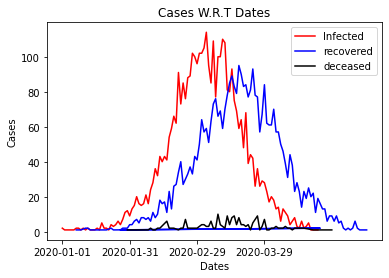

In [ ]:
plt.plot(infected.index, infected, color='red', label = 'Infected')
plt.plot(recovered.index, recovered, color='blue', label = 'recovered')
plt.plot(deceased.index, deceased, color='black', label = 'deceased')
plt.title("Cases W.R.T Dates")
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.xticks(infected.index[::29])
plt.show()

# **Task 2 Question 2:**  Plot a pie chart for the ratio of asymptomatic and symptomatic infections. 

In [ ]:
type(covid.is_symptomatic[0])

numpy.int64

In [ ]:
asymptomatic = len(covid[(covid.infection_status == 'infected') & (covid.is_symptomatic == 0)].drop_duplicates(subset = ['id']))
symptomatic = len(covid[(covid.infection_status == 'infected') & (covid.is_symptomatic == 1)].drop_duplicates(subset = ['id']))

print(asymptomatic,symptomatic)

3854 2651


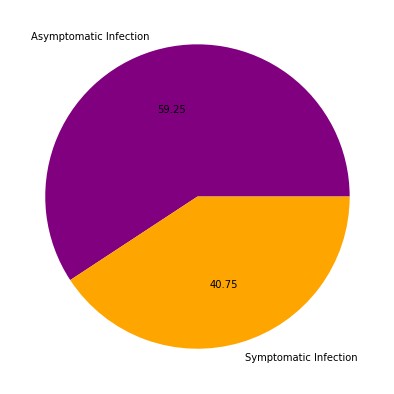

In [ ]:
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
# plt.pie([asymptomatic,symptomatic], labels = ["asymptomatic", "symptomatic"]) 
plt.pie([asymptomatic,symptomatic], autopct = '%.2f', labels = ["Asymptomatic Infection" , "Symptomatic Infection"], colors = ["purple" , "orange"] )
# show plot 
plt.show()

# **Task 2 Question 3:**  Plot the variation of proximity of individual (ID=37415) w.r.t date.

In [ ]:
for_proximity[['Date','Time']] = for_proximity.Date_Time.str.split(expand=True)

,id_x,Date_Time,currentLocationID,currentLocationType,id_y,Date,Time
0,37415,2020-01-01 00:00:00,3000,residential,38841,2020-01-01,00:00:00
1,37415,2020-01-01 00:00:00,3000,residential,37622,2020-01-01,00:00:00
2,37415,2020-01-01 00:00:00,3000,residential,32657,2020-01-01,00:00:00
3,37415,2020-01-01 08:00:00,3690,employment,37235,2020-01-01,08:00:00
4,37415,2020-01-01 08:00:00,3690,employment,38915,2020-01-01,08:00:00
...,...,...,...,...,...,...,...
9660,37415,2020-05-15 19:00:00,4791,market,19853,2020-05-15,19:00:00
9661,37415,2020-05-15 19:00:00,4791,market,40500,2020-05-15,19:00:00
9662,37415,2020-05-15 22:00:00,3000,residential,38841,2020-05-15,22:00:00
9663,37415,2020-05-15 22:00:00,3000,residential,37622,2020-05-15,22:00:00


In [ ]:
for_proximity = for_proximity.drop_duplicates(subset = ['id_x', 'Date', 'id_y'])

In [ ]:
Number_of_People_byDate = for_proximity.drop_duplicates(subset = ['id_x', 'Date', 'id_y']).groupby(['Date']).id_y.count()
Number_of_People_byDate.rename("Number of People in Proximity with 37415 w.r.t date")

Date
2020-01-01    61
2020-01-02    83
2020-01-03    14
2020-01-04    53
2020-01-05    54
              ..
2020-05-11    89
2020-05-12    32
2020-05-13    30
2020-05-14     7
2020-05-15    52
Name: Number of People in Proximity with 37415 w.r.t date, Length: 136, dtype: int64

In [ ]:
Number_of_People_byDate.sum() #Just Checking

6159

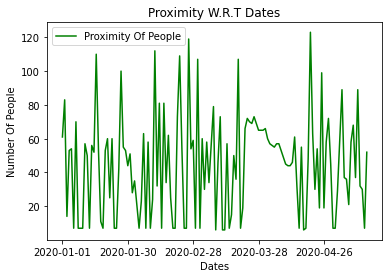

In [ ]:
plt.plot(Number_of_People_byDate.index, Number_of_People_byDate, color='green', label = 'Proximity Of People')
plt.title("Proximity W.R.T Dates")
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Number Of People")
plt.xticks(Number_of_People_byDate.index[::29])
plt.show()

# **Task 2 Question 4:**  Plot bar graphs to show the mortality rates and infection rates per age groups (create age groups 0-10, 10-20, and so on).

In [ ]:
covid.age.max()

90

In [ ]:
zero_10_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age >= 0) & (covid.age <= 10)].drop_duplicates(subset = 'id'))
ten_20_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 10) & (covid.age <= 20)].drop_duplicates(subset = 'id'))
twenty_30_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 20) & (covid.age <= 30)].drop_duplicates(subset = 'id'))
thirty_40_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 30) & (covid.age <= 40)].drop_duplicates(subset = 'id'))
forty_50_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 40) & (covid.age <= 50)].drop_duplicates(subset = 'id'))
fifty_60_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 50) & (covid.age <= 60)].drop_duplicates(subset = 'id'))
sixty_70_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 60) & (covid.age <= 70)].drop_duplicates(subset = 'id'))
seventy_80_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 70) & (covid.age <= 80)].drop_duplicates(subset = 'id'))
eighty_90_infected = len(covid.loc[(covid.infection_status == "infected") & (covid.age > 80) & (covid.age <= 90)].drop_duplicates(subset = 'id'))

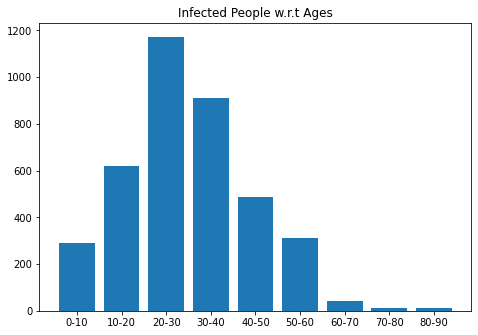

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
stats_inf = [zero_10_infected,ten_20_infected,twenty_30_infected,thirty_40_infected,forty_50_infected,fifty_60_infected,sixty_70_infected,seventy_80_infected,eighty_90_infected]
ax.bar(labels,stats_inf)
plt.title('Infected People w.r.t Ages')
plt.show()

In [ ]:
zero_10_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age >= 0) & (covid.age <= 10)].drop_duplicates(subset = 'id'))
ten_20_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 10) & (covid.age <= 20)].drop_duplicates(subset = 'id'))
twenty_30_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 20) & (covid.age <= 30)].drop_duplicates(subset = 'id'))
thirty_40_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 30) & (covid.age <= 40)].drop_duplicates(subset = 'id'))
forty_50_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 40) & (covid.age <= 50)].drop_duplicates(subset = 'id'))
fifty_60_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 50) & (covid.age <= 60)].drop_duplicates(subset = 'id'))
sixty_70_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 60) & (covid.age <= 70)].drop_duplicates(subset = 'id'))
seventy_80_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 70) & (covid.age <= 80)].drop_duplicates(subset = 'id'))
eighty_90_deceased = len(covid.loc[(covid.infection_status == "deceased") & (covid.age > 80) & (covid.age <= 90)].drop_duplicates(subset = 'id'))

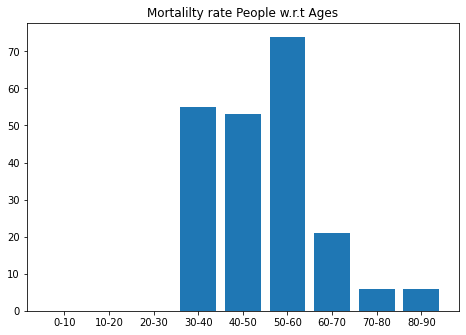

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
stats_dec = [zero_10_deceased,ten_20_deceased,twenty_30_deceased,thirty_40_deceased,forty_50_deceased,fifty_60_deceased,sixty_70_deceased,seventy_80_deceased,eighty_90_deceased]
ax.bar(labels,stats_dec)
plt.title('Mortalilty rate People w.r.t Ages')
plt.show()

<BarContainer object of 9 artists>

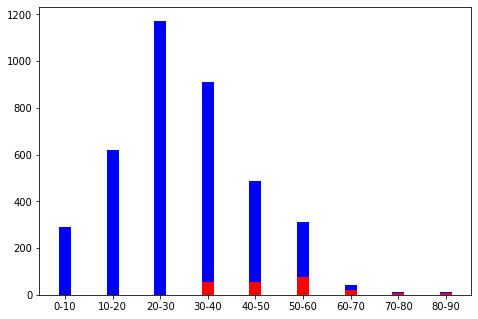

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, stats_inf, color = 'b', width = 0.25)
ax.bar(labels, stats_dec, color = 'r', width = 0.25)

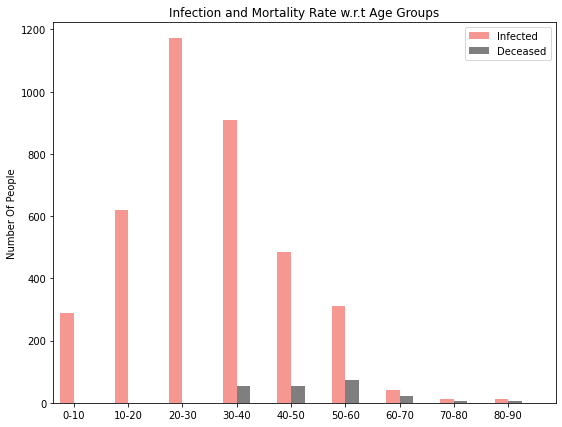

In [ ]:
    # Setting the positions and width for the bars
    pos = list(range(len(labels)))
    width = 0.25

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(9,7))

    # Creating a bar with Maths_score data
    plt.bar(pos, stats_inf, width, alpha=0.5, color='#EE3224')
    #plt.show()

    # Creating a bar with Science_score data,
    plt.bar([p + width for p in pos], stats_dec, width, alpha=0.5, color='#000000')
    #plt.show()


    # Setting the y axis label
    ax.set_ylabel('Number Of People')

    # Setting the chart's title
    ax.set_title('Infection and Mortality Rate w.r.t Age Groups')

    # Setting the position of the x ticks
    ax.set_xticks([p + width/2 for p in pos])

    # Setting the labels for the x ticks
    ax.set_xticklabels(labels)

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(stats_inf + stats_dec)+50] )

    # Adding the legend and showing the plot
    plt.legend(['Infected', 'Deceased']) # plt.legend(['Infected', 'Deceased'], loc='upper left')
    # plt.grid()
    plt.show()

# **Task 2 Question 5:**  Visualize the number of individuals at a location on a geographical map. (COMPLEX: Can be done with Tableau, Plotly)


In [7]:
avg_lat = covid.lat.mean()
avg_long = covid.lon.mean()
avg_long, avg_lat

(106.8290600511762, -6.210078848198602)

In [8]:
unique_loc = covid.drop_duplicates(subset = ["lat", "lon", "id"])
length1 = len(unique_loc)
# unique_loc.count

In [9]:
length1

592271

KeyError: ignored

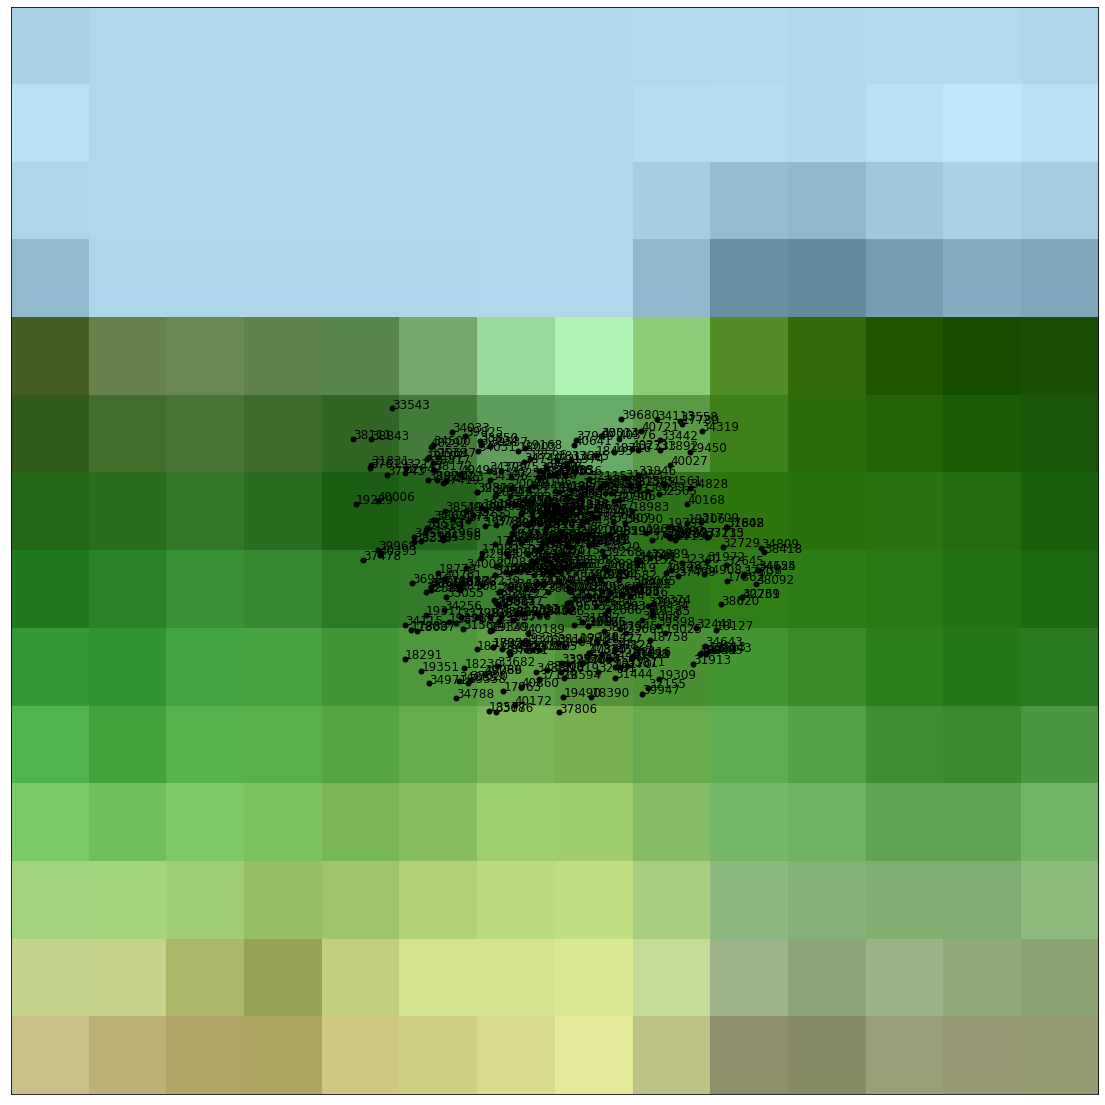

In [54]:
fig = plt.figure(figsize=(20, 20))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=45, lon_0=-100,)


# Map (long, lat) to (x, y) for plotting
# x, y = m(-125, 47.6)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' abc', fontsize=12);
# ==========================================================================

# m = Basemap(projection='lcc', resolution=None,
#             width=10000, height=10000, 
#             lat_0=avg_lat, lon_0=avg_long,)
# m.etopo()
# x, y = m(unique_loc["lon"][0], unique_loc["lat"][0])
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, unique_loc["id"][0], fontsize=12);

# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=avg_lat, lon_0=avg_long,)
# m.etopo(scale=0.5, alpha=0.5)

for i in range(length1): # Max being handeled till 432 Index
  # print(i)
  m = Basemap(projection='lcc', resolution=None,
            width=10000, height=10000, 
            lat_0=avg_lat, lon_0=avg_long,)
  m.etopo()
  x, y = m(unique_loc["lon"][i], unique_loc["lat"][i])
  plt.plot(x, y, 'ok', markersize=5)
  plt.text(x, y, unique_loc["id"][i], fontsize=12);

m.etopo()
# plt.title("Lambert Conformal Projection")
# plt.show()

In [10]:
fig = plt.figure(figsize=(300, 300))
lat = unique_loc['lat'].values
lon = unique_loc['lon'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'l',
            area_thresh=10.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=2)
plt.show()